In [3]:
import pandas as pd # type: ignore
import numpy as np # type: ignore
import seaborn as sns # type: ignore

# Loading the dataset

In [4]:
df = pd.read_csv("train.csv")

In [5]:
df.head()

,Text,Emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [6]:
df['Emotion'].value_counts()

Emotion
joy         5362
sadness     4666
anger       2159
fear        1937
love        1304
surprise     572
Name: count, dtype: int64

<Axes: xlabel='Emotion', ylabel='count'>

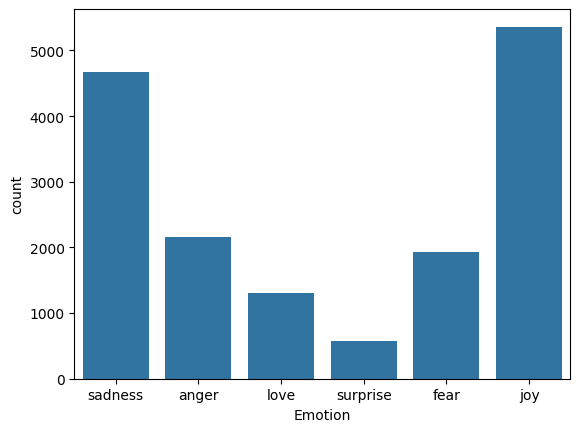

In [7]:
sns.countplot(x='Emotion',data=df)

# Data pre-processing

In [8]:
import neattext.functions as nfx # type: ignore

# Remove the user handles
df['Clean_Text'] = df['Text'].apply(nfx.remove_userhandles)

In [9]:
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [10]:
#Remove the stopwords
df['Clean_Text'] = df['Clean_Text'].apply(nfx.remove_stopwords)

In [11]:
df

,Text,Emotion,Clean_Text
0,i didnt feel humiliated,sadness,didnt feel humiliated
1,i can go from feeling so hopeless to so damned...,sadness,feeling hopeless damned hopeful cares awake
2,im grabbing a minute to post i feel greedy wrong,anger,im grabbing minute post feel greedy wrong
3,i am ever feeling nostalgic about the fireplac...,love,feeling nostalgic fireplace know property
4,i am feeling grouchy,anger,feeling grouchy
...,...,...,...
15995,i just had a very brief time in the beanbag an...,sadness,brief time beanbag said anna feel like beaten
15996,i am now turning and i feel pathetic that i am...,sadness,turning feel pathetic waiting tables subbing t...
15997,i feel strong and good overall,joy,feel strong good overall
15998,i feel like this was such a rude comment and i...,anger,feel like rude comment im glad


Splitting data into input variables and target variables

x:Features are the attributes and variables extracted from the dataset. These extracted features are used as inputs to the model during training.

y:Labels are the output or the target variable.

In [12]:
x = df['Clean_Text']
y = df['Emotion']

# Splitting data into train and test set

We need to split our dataset into a train set and test set. The model will learn from the the train set. We will use the test to evaluate the model performance and measure the model's knowledge capability.

In [13]:
from sklearn.model_selection import train_test_split # type: ignore

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

# Training the model

In [14]:
from sklearn.pipeline import Pipeline # type: ignore
from sklearn.feature_extraction.text import CountVectorizer # type: ignore
from sklearn.svm import SVC # type: ignore
from sklearn.ensemble import RandomForestClassifier # type: ignore
from sklearn.linear_model import LogisticRegression # type: ignore
from sklearn import preprocessing

In [15]:
pipe_lr = Pipeline(steps=[('cv',CountVectorizer()),('lr',LogisticRegression())])
pipe_lr.fit(x_train,y_train)
pipe_lr.score(x_test,y_test)

0.8879166666666667

In [16]:
pipe_svm = Pipeline(steps=[('cv',CountVectorizer()),('svc',SVC(kernel = 'rbf',C = 10))])
pipe_svm.fit(x_train,y_train)
pipe_svm.score(x_test,y_test)

0.8397916666666667

In [17]:
pipe_rf = Pipeline(steps=[('cv',CountVectorizer()),('rf',RandomForestClassifier(n_estimators=10))])
pipe_rf.fit(x_train,y_train)
pipe_rf.score(x_test,y_test)

0.8745833333333334

# Saving the model

In [18]:
import joblib # type: ignore

joblib.dump(pipe_lr, "pipe_lr.joblib")


['pipe_lr.joblib']

pipe_lr = joblib.load('pipe_lr.joblib')

In [19]:
predictions = pipe_lr.predict(x_test)
predictions


array(['sadness', 'joy', 'sadness', ..., 'fear', 'joy', 'fear'],
      shape=(4800,), dtype=object)